In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


39.819283872435136 -83.68941457518844
83.64761569886375 80.09366899491863
-72.59036963956487 12.36996866230541
89.82180516410844 42.9831147151323
-12.969830891457534 -138.51478537892777
74.29585394250009 -27.52079131412819
-10.070830550615085 140.4169962766822
-84.73838920059265 47.96976550075729
-5.668881290800741 57.80553219217785
-27.767989296856626 -175.7711479918059
7.602628198076005 -79.83611688973669
30.69774465913011 -27.816447572252883
-85.52456695494631 104.17942916432867
-69.82291153709225 -107.35456148450955
17.434472671305386 -73.73267292996617
-31.247617329868334 -92.41060770016203
58.83237379629165 106.10812442724347
24.161816759334272 9.86561995024411
-31.780043763165978 102.25180227904019
44.12589382986937 -157.2723957721448
47.409111838491214 68.54286233923466
75.19505834700809 120.35989648682192
62.08642140882313 -63.952857857167444
73.15408337370502 -93.3606049595472
2.671625251223631 -157.407518475241
-7.189448569112912 125.54873646025584
2.2965944180895264 119.729

-49.25791823511144 178.85120798941495
12.288264127384224 -13.974098619697031
19.333044716571436 68.30990870373745
36.369022314501436 -42.632506153762165
31.655873690853724 48.09445280478124
-18.829692989816806 -167.36654850176677
56.904857716149905 -105.3797680753627
-61.75314961031454 99.77250354290862
-8.064518838170713 131.72130249660177
35.4707068299853 103.19568342428357
21.699854935120527 -101.80927142814319
-52.58597960030293 167.13230569028178
-51.029419496450465 -34.57905815157858
-0.06255340779100038 90.09890642461176
35.46465432340332 -34.24742158424013
25.273259707518136 -130.47546895548942
86.2895522815729 169.7272957744321
-37.47685596878314 104.85701864545945
9.48351048543394 156.04984356074357
78.48964543382965 -156.7734489924791
82.31247931633808 -95.74446732784727
-15.384924049812128 29.35696266523064
9.091913946867948 -125.48520585720323
-50.49683881132767 -94.89970053008071
55.075807352938625 136.75784873063986
88.13574157935781 -151.52180109771447
-44.1732031734636

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38dcbca4e18440eb988aff406f53a3fa


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "city"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38dcbca4e18440eb988aff406f53a3fa&q=city


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "city"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': 149.1292, 'lat': -35.2813},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 33.94,
  'feels_like': 33.94,
  'temp_min': 33.01,
  'temp_max': 35.01,
  'pressure': 1017,
  'humidity': 93},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 235, 'gust': 1.95},
 'clouds': {'all': 0},
 'dt': 1618165873,
 'sys': {'type': 1,
  'id': 9588,
  'country': 'AU',
  'sunrise': 1618172675,
  'sunset': 1618213420},
 'timezone': 36000,
 'id': 2172517,
 'name': 'City',
 'cod': 200}

In [11]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":149.1292,"lat":-35.2813},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":33.94,"feels_like":33.94,"temp_min":33.01,"temp_max":35.01,"pressure":1017,"humidity":93},"visibility":10000,"wind":{"speed":1.99,"deg":235,"gust":1.95},"clouds":{"all":0},"dt":1618165873,"sys":{"type":1,"id":9588,"country":"AU","sunrise":1618172675,"sunset":1618213420},"timezone":36000,"id":2172517,"name":"City","cod":200}'

In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | springfield
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | merauke
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | pedasi
Processing Record 12 of Set 1 | ponta delgada
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | les cayes
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | markova
Processing Record 18 of Set 1 | gat
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | zhezkazgan
Processing Record 22 of 

City not found. Skipping...
Processing Record 5 of Set 4 | omsukchan
City not found. Skipping...
Processing Record 6 of Set 4 | north bend
City not found. Skipping...
Processing Record 7 of Set 4 | parrita
City not found. Skipping...
Processing Record 8 of Set 4 | sao joao da barra
City not found. Skipping...
Processing Record 9 of Set 4 | tuktoyaktuk
City not found. Skipping...
Processing Record 10 of Set 4 | avarua
City not found. Skipping...
Processing Record 11 of Set 4 | kavieng
City not found. Skipping...
Processing Record 12 of Set 4 | sorland
City not found. Skipping...
Processing Record 13 of Set 4 | tigil
City not found. Skipping...
Processing Record 14 of Set 4 | lubu
City not found. Skipping...
Processing Record 15 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 16 of Set 4 | coihaique
City not found. Skipping...
Processing Record 17 of Set 4 | cayenne
City not found. Skipping...
Processing Record 18 of Set 4 | pangody
City not found. Skipping...
Proce

City not found. Skipping...
Processing Record 24 of Set 6 | kahului
City not found. Skipping...
Processing Record 25 of Set 6 | taoudenni
City not found. Skipping...
Processing Record 26 of Set 6 | shelburne
City not found. Skipping...
Processing Record 27 of Set 6 | obidos
City not found. Skipping...
Processing Record 28 of Set 6 | samarai
City not found. Skipping...
Processing Record 29 of Set 6 | arraial do cabo
City not found. Skipping...
Processing Record 30 of Set 6 | dwarka
City not found. Skipping...
Processing Record 31 of Set 6 | la carolina
City not found. Skipping...
Processing Record 32 of Set 6 | kristiansund
City not found. Skipping...
Processing Record 33 of Set 6 | ostrovnoy
City not found. Skipping...
Processing Record 34 of Set 6 | yamada
City not found. Skipping...
Processing Record 35 of Set 6 | najran
City not found. Skipping...
Processing Record 36 of Set 6 | emilio carranza
City not found. Skipping...
Processing Record 37 of Set 6 | westport
City not found. Skip

City not found. Skipping...
Processing Record 43 of Set 8 | portland
City not found. Skipping...
Processing Record 44 of Set 8 | powell river
City not found. Skipping...
Processing Record 45 of Set 8 | chandbali
City not found. Skipping...
Processing Record 46 of Set 8 | temaraia
City not found. Skipping...
Processing Record 47 of Set 8 | san miguel de sema
City not found. Skipping...
Processing Record 48 of Set 8 | marienburg
City not found. Skipping...
Processing Record 49 of Set 8 | axim
City not found. Skipping...
Processing Record 50 of Set 8 | khandyga
City not found. Skipping...
Processing Record 1 of Set 9 | puerto narino
City not found. Skipping...
Processing Record 2 of Set 9 | dicabisagan
Processing Record 3 of Set 9 | airai
Processing Record 4 of Set 9 | dingle
Processing Record 5 of Set 9 | uk
City not found. Skipping...
Processing Record 6 of Set 9 | rocha
Processing Record 7 of Set 9 | buin
Processing Record 8 of Set 9 | paamiut
Processing Record 9 of Set 9 | moindou
Pro

Processing Record 24 of Set 12 | panjwin
City not found. Skipping...
Processing Record 25 of Set 12 | scottsbluff
Processing Record 26 of Set 12 | santa adelia
Processing Record 27 of Set 12 | warqla
City not found. Skipping...
Processing Record 28 of Set 12 | tapaua
City not found. Skipping...
Processing Record 29 of Set 12 | barkhan
Processing Record 30 of Set 12 | aranda de duero
Processing Record 31 of Set 12 | maniitsoq
Processing Record 32 of Set 12 | roma
Processing Record 33 of Set 12 | bathsheba
Processing Record 34 of Set 12 | miami beach
Processing Record 35 of Set 12 | weiser
Processing Record 36 of Set 12 | tabou
Processing Record 37 of Set 12 | grand gaube
Processing Record 38 of Set 12 | evensk
Processing Record 39 of Set 12 | flin flon
Processing Record 40 of Set 12 | allonnes
Processing Record 41 of Set 12 | santa engracia
Processing Record 42 of Set 12 | karratha
Processing Record 43 of Set 12 | mbandaka
Processing Record 44 of Set 12 | caxito
Processing Record 45 of 

In [17]:
len(city_data)

265

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Springfield,37.2153,-93.2982,70.00,37,1,13.80,US,2021-04-11 18:30:03
1,Dikson,73.5069,80.5464,26.65,94,100,27.25,RU,2021-04-11 18:31:16
2,Hermanus,-34.4187,19.2345,66.00,86,100,1.99,ZA,2021-04-11 18:31:17
3,Atuona,-9.8000,-139.0333,80.49,77,34,18.50,PF,2021-04-11 18:21:25
4,Merauke,-8.4667,140.3333,77.20,83,9,3.27,ID,2021-04-11 18:22:32
5,Port Alfred,-33.5906,26.8910,67.01,90,97,3.04,ZA,2021-04-11 18:31:17
6,Victoria,22.2855,114.1577,73.00,85,37,9.13,HK,2021-04-11 18:22:31
7,Vaini,-21.2000,-175.2000,66.20,94,20,2.30,TO,2021-04-11 18:31:18
8,Pedasi,7.5333,-80.0333,84.00,68,37,8.05,PA,2021-04-11 18:31:18
9,Ponta Delgada,37.7333,-25.6667,64.40,94,40,9.22,PT,2021-04-11 18:22:54


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df= city_data_df[new_column_order]

In [20]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Springfield,US,2021-04-11 18:30:03,37.2153,-93.2982,70.00,37,1,13.80
1,Dikson,RU,2021-04-11 18:31:16,73.5069,80.5464,26.65,94,100,27.25
2,Hermanus,ZA,2021-04-11 18:31:17,-34.4187,19.2345,66.00,86,100,1.99
3,Atuona,PF,2021-04-11 18:21:25,-9.8000,-139.0333,80.49,77,34,18.50
4,Merauke,ID,2021-04-11 18:22:32,-8.4667,140.3333,77.20,83,9,3.27
5,Port Alfred,ZA,2021-04-11 18:31:17,-33.5906,26.8910,67.01,90,97,3.04
6,Victoria,HK,2021-04-11 18:22:31,22.2855,114.1577,73.00,85,37,9.13
7,Vaini,TO,2021-04-11 18:31:18,-21.2000,-175.2000,66.20,94,20,2.30
8,Pedasi,PA,2021-04-11 18:31:18,7.5333,-80.0333,84.00,68,37,8.05
9,Ponta Delgada,PT,2021-04-11 18:22:54,37.7333,-25.6667,64.40,94,40,9.22


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

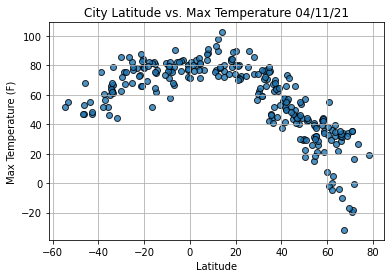

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

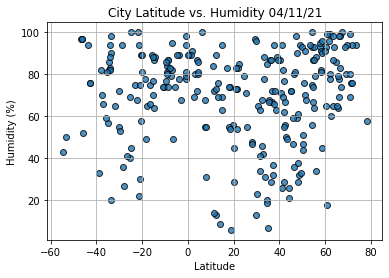

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

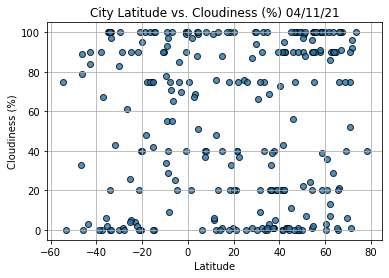

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

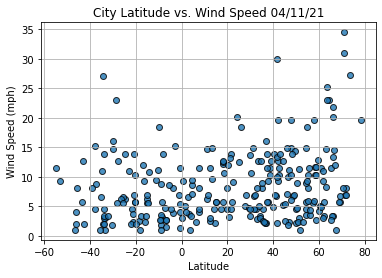

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
index13 = city_data_df.loc[13]
index13

City                         Lebu
Country                        CL
Date          2021-04-11 18:21:25
Lat                      -37.6167
Lng                        -73.65
Max Temp                    60.53
Humidity                       70
Cloudiness                      0
Wind Speed                  15.26
Name: 13, dtype: object

In [47]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
260    False
261     True
262    False
263    False
264    False
Name: Lat, Length: 265, dtype: bool

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Springfield,US,2021-04-11 18:30:03,37.2153,-93.2982,70.00,37,1,13.80
1,Dikson,RU,2021-04-11 18:31:16,73.5069,80.5464,26.65,94,100,27.25
6,Victoria,HK,2021-04-11 18:22:31,22.2855,114.1577,73.00,85,37,9.13
8,Pedasi,PA,2021-04-11 18:31:18,7.5333,-80.0333,84.00,68,37,8.05
9,Ponta Delgada,PT,2021-04-11 18:22:54,37.7333,-25.6667,64.40,94,40,9.22
...,...,...,...,...,...,...,...,...,...
256,Evensk,RU,2021-04-11 18:33:45,61.9500,159.2333,-4.92,78,13,11.03
257,Flin Flon,CA,2021-04-11 18:34:20,54.7682,-101.8650,30.20,74,90,9.22
258,Allonnes,FR,2021-04-11 18:38:27,47.9674,0.1581,46.40,61,90,10.36
259,Santa Engracia,ES,2021-04-11 18:38:27,41.9406,-1.3245,55.00,62,20,19.57


In [49]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Springfield,US,2021-04-11 18:30:03,37.2153,-93.2982,70.00,37,1,13.80
1,Dikson,RU,2021-04-11 18:31:16,73.5069,80.5464,26.65,94,100,27.25
6,Victoria,HK,2021-04-11 18:22:31,22.2855,114.1577,73.00,85,37,9.13
8,Pedasi,PA,2021-04-11 18:31:18,7.5333,-80.0333,84.00,68,37,8.05
9,Ponta Delgada,PT,2021-04-11 18:22:54,37.7333,-25.6667,64.40,94,40,9.22


In [60]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

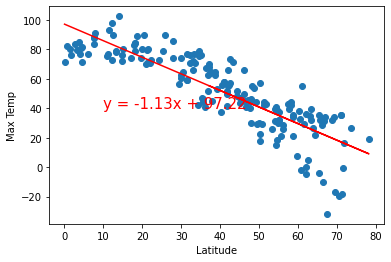

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


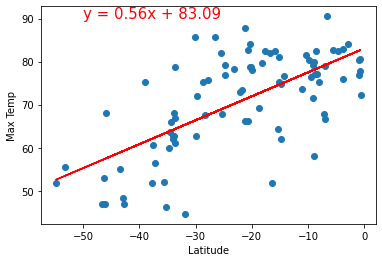

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


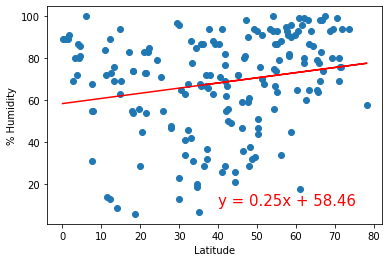

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

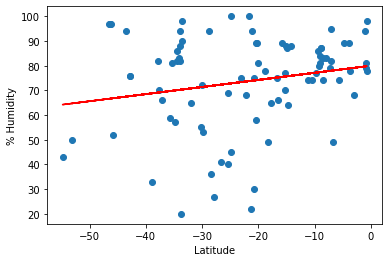

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

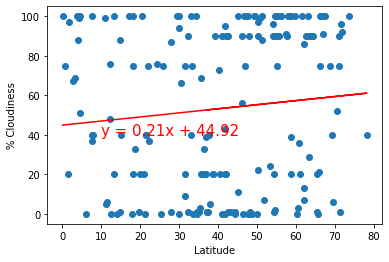

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10, 40))

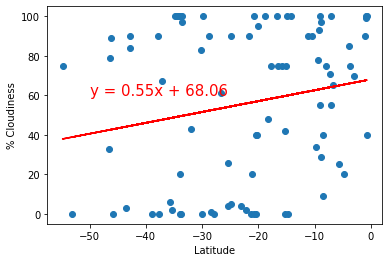

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

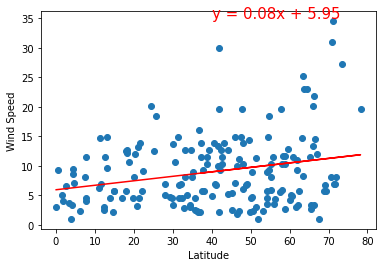

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

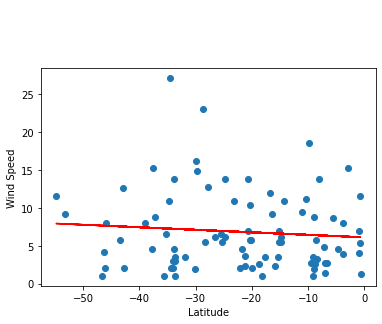

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))